<a href="https://colab.research.google.com/github/Mingfei-L6/4580/blob/main/orie_4580_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 3

#### Students: Mingfei Liao (ml2489), Jijuan Xu (jx286)

### Github link: [OUR Github link](https://github.com/Mingfei-L6/4580/blob/main/orie_4580_HW3.ipynb)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [16]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [17]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)



In [18]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)
    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

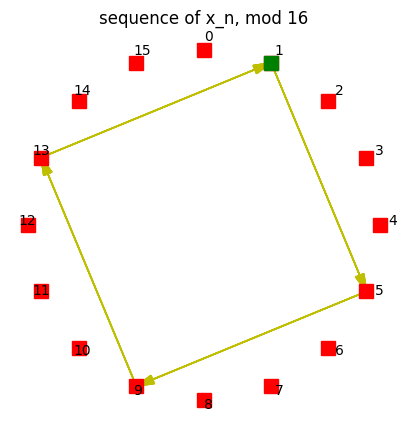

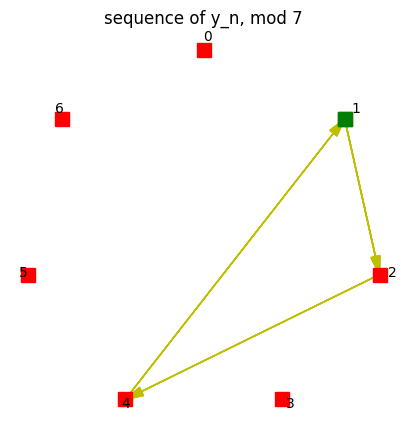

In [19]:
# Ans
# run clock function
# lcg x
m = 16
a = 5
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
plt.title('sequence of x_n, mod 16')
plt.axis('off')
plt.show()

# lcg y
m = 7
a = 2
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
y = LCG(n=m+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,y,fig)
plt.title('sequence of y_n, mod 7')
plt.axis('off')
plt.show()

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

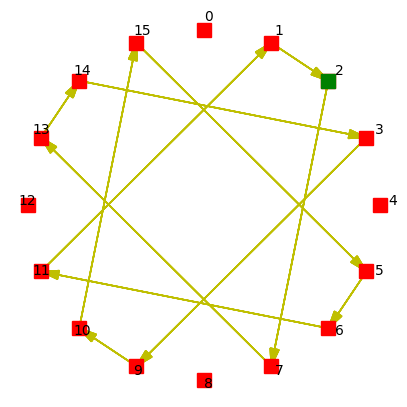

In [20]:
# combined LCGs function
def plot_clock_face_combined(m, fig, annotate=False):
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize=10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path_combined(m, x, fig, color='y'):
    theta_0 = 2.0 * np.pi * x[0] / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize=10)
    for i in range(len(x)-1):
        theta_start = 2.0 * np.pi * x[i] / m
        theta_end   = 2.0 * np.pi * x[i+1] / m
        x_start, y_start = np.sin(theta_start), np.cos(theta_start)
        del_x, del_y = np.sin(theta_end)-x_start, np.cos(theta_end)-y_start
        plt.arrow(x_start, y_start, del_x, del_y,
                  length_includes_head=True, head_width=0.05, head_length=0.1,
                  fc=color, ec=color)

def LCG_sequence(n, m, a, c=0, seed=1):
    seq = np.zeros(n, dtype=int)
    x = seed
    for i in range(n):
        seq[i] = x
        x = (a * x + c) % m
    return seq

seed = 1
m1 = 16
a1 = 5
m2 = 7
a2 = 2
n = 50  # number steps

x = LCG_sequence(n=n,m=m1,a=a1,c=0,seed = seed)
y = LCG_sequence(n=n,m=m2,a=a2,c=0,seed = seed)
z = (x + y) % m1

fig = plt.figure(figsize=(5,5))
plot_clock_face_combined(m1,fig,annotate = True)
plot_clock_path_combined(m1,z,fig)
plt.axis('off')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.
The periods of $x_n$, $y_n$, and $z_n$ are as follows:

$x_n$: 4

$y_n$: 3

$z_n$: 12


___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.
For $F^{-1}(y)$:

when y = 0, $F^{-1}(0) = \inf\{x|F(x)\geq 0\} = 0$

when  0 $<$ y $< \frac{1}{2}$, since $F(x)=x$, $F^{-1}(y) = y$

when y = 1/2, $F^{-1}(1/2) = \inf\{x|F(x)\geq 1/2\} = \frac{1}{2}$

when $\frac{1}{2} <$ y $< 1$, we are looking for an x where $F(x)> \frac{1}{2}$, $F^{-1}(y) = 1$

when y=1,  $F^{-1}(1) = \inf\{x|F(x)\geq 1\} = 1$

so,	$$F^{-1}(y)=
	\begin{cases}
	0 & \mbox{for $y = 0$}\\
	y & \mbox{for $0 < y < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for y = $\frac{1}{2}$ }, \\
	1 & \mbox{for $\frac{1}{2} < y \leq 1$}
	 \end{cases}$$


___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

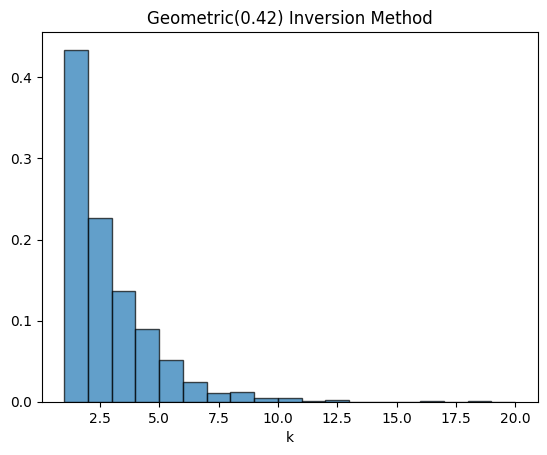

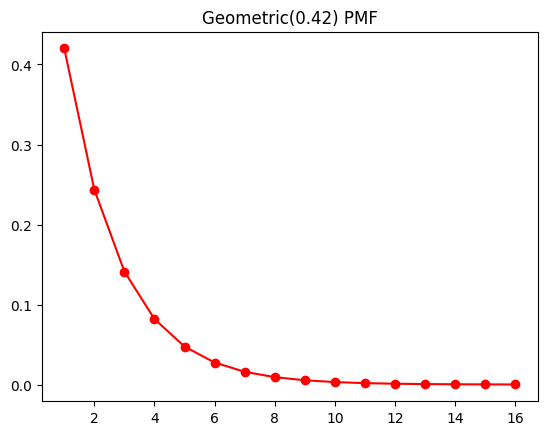

In [21]:
p = 0.42
n_samples = 1000

#inversion method
#we used ChatGPT as draft and to find the round up function to mimic inf{}
U = np.random.rand(n_samples)
## since np.ceil rounds up values it takes in, it would output the lowest whole
## value of x that satisfy F(x)>=y
samples = np.ceil(np.log(1 - U) / np.log(1 - p)).astype(int)
bin_def = np.arange(1, max(samples)+3)
plt.hist(samples, bins=bin_def, density=True, alpha=0.7, edgecolor="black")
plt.title("Geometric(0.42) Inversion Method")
plt.xlabel("k")
plt.show()

#pmf distribution from geom
geom_method = scipy.stats.geom.rvs(p, size=n_samples, random_state=42)
ks = np.arange(1, max(geom_method)+1)
plt.plot(ks, scipy.stats.geom.pmf(ks, p), 'ro-')
plt.title("Geometric(0.42) PMF")
plt.show();




___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.
We need to find the cdf F(x) first.
* when $x<0$, $F(x)=0$
* when $0 \leq x \leq 2$, $F(x)=\int_0^x e^{t-2}  dt = \left[e^{t-2}\right]_0^x = e^{x-2} - e^{-2}$
* when $x > 2$, $F(x) = \int_0^2 e^{t-2}  dt + \int_2^x e^{-t}  dt = ((e^{2-2}) + - e^{-2}) + (\left[-e^{-t}\right]_2^x)= (1 - e^{-2}) + (-e^{-x} + e^{-2})
 = 1 - e^{-x} $

 Henec, we have:
$$
F(x) =
	\begin{cases}
		e^{x-2} - e^{-2} & \text{for }0 \leq x \leq 2, \\
		1 - e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise (x<0),}
	\end{cases}
$$

To find $F^{-1}(y)$:
* for y=0: the smallest $x$ with $F(x)\geq 0$ is 0, so $$F^{-1}(0)=0$$.

* when $x=0$, $y=F(0)=0$, when $x=2$, $y=F(2)=e^{-2}*(e^2 -1)=1-e^{-2}$, so $0 \leq x \leq 2$ converts to $0 < y < 1-e^{-2}$. We now look for smallest x that satisfy:
$$e^{x-2}-e^{-2} \geq y$$
$$x-2 \geq ln(y+e^{-2})$$
$$x \geq ln(y+e^{-2}) +2$$
hence, $F^{-1}(y)= ln(y+e^{-2})+2 $

* as above, when $x=2$, $y=F(2)=1-e^{-2}$, and as x approaches positive infinity, $y=F(x)$ appraches 1. so, $x>2$ converts to $ 1-e^{-2}< y < 1$. We now look for smallest x>2 that satisfy:
$$1-e^{-x} \geq y$$
$$e^{-x} \leq 1-y$$
$$x \geq -ln(1-y)$$
hence, $F^{-1}(y)= -ln(1-y) $

This means:
$$
F^{-1}(y)=
	\begin{cases}
		ln(y+e^{-2})+2 & \text{for } 0 < y < 1-e^{-2}, \\
		-ln(1-y) & \text{for }1-e^{-2}< y < 1, \\
		0 & \text{for} y=0
	\end{cases}
$$

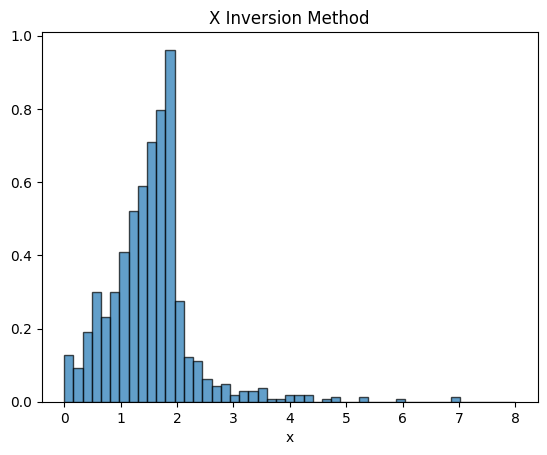

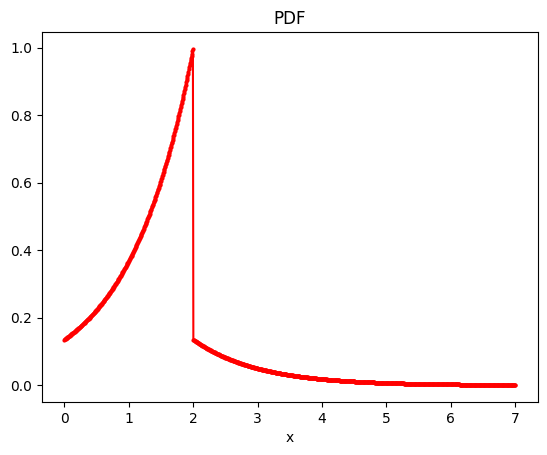

In [22]:
n_samples = 1000
U = np.random.rand(n_samples)
threshold = 1 - np.exp(-2)

#inversion method
samples = np.where(U <= threshold, np.log(U + np.exp(-2)) + 2, -np.log(1 - U))
bin_def = np.linspace(0,max(samples)+1,50)
plt.hist(samples, bins=bin_def, density=True, alpha=0.7, edgecolor="black")
plt.title("X Inversion Method")
plt.xlabel("x")
plt.show()

#pdf (we used ChatGPT to find the np.piecewise function)
x_range = np.linspace(0, max(samples), 1000)
## like the absolute value function, we can use np.piecewise to model f(x),
## since f(x) is broken into two pieces with the intercept at x=2.
pdf_values = np.piecewise(x_range,
                         [x_range <= 2, x_range > 2],
                         [lambda x: np.exp(x-2), lambda x: np.exp(-x)])

plt.plot(x_range, pdf_values, 'ro-', markersize=2)
plt.title("PDF")
plt.xlabel("x")
plt.show()



<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.

Since every coefficient of the polynomial is positive, this means $f(x)=(5x4+4x3+3x2+1)/4$ is increasing over the interval $0 \leq x \leq 1$. This means, for $0 \leq x \leq 1$, max$f(x)=f(1)=13/4=3.25.$

In [23]:
#target density function
def target_density(x):
    if 0 <= x <= 1:
        return (5*(x**4) + 4*(x**3) + 3*(x**2) + 1) / 4
    else:
        return 0

#acceptance-rejection algorithm
def accep_rejec_X(n_samples):
  c = 13/4

  samples = []
  ntrials = 0
  while len(samples) < n_samples:
        ntrials += 1

        Y = np.random.uniform(0, 1)
        U = np.random.uniform(0, 1)

        f_Y = target_density(Y)

        if U <= f_Y / c:
            samples.append(Y)

  return np.array(samples), ntrials

<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

### Ans.
P(accept) = $\frac{1}{c} \int_0^1 f(x) dx$. Since $\int_0^1 f(x) dx = 1$, and we have $c$ = max $f(x) = \frac{13}{4}$

Hence, P(accept) = $\frac{1}{c} = \frac{4}{13}$

$E$[trials] = $\frac{1}{P} = c = 3.25$

Since two uniform samples are used each trial, this means:

$E$[samples] = 2 * $E$[trials] = $\frac{2}{P} = c = 2* 3.25 = 6.5$

<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

Target samples: 2500
Number of trials: 8128
Number of uniform samples used 16256
Acceptance rate: 0.3075787401574803


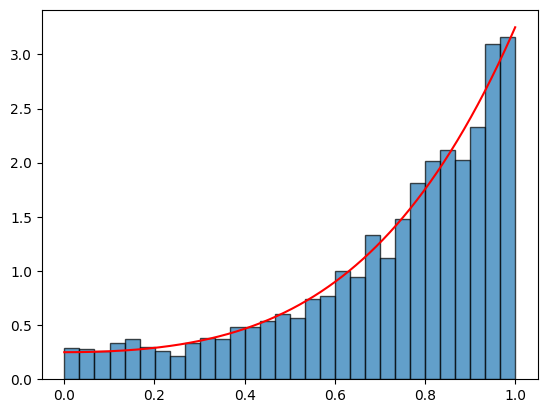

In [24]:
#Generate 2500 samples of X
np.random.seed()
n_samples = 2500

samples, ntrials = accep_rejec_X(n_samples)
uniform_samples_count = 2 * ntrials
acceptance_rate = n_samples / ntrials

print("Target samples:", n_samples)
print("Number of trials:", ntrials)
print("Number of uniform samples used", uniform_samples_count)
print("Acceptance rate:", acceptance_rate)

#plot Generated Samples with histogram plot
plt.hist(samples, bins=30, density=True, alpha=0.7, edgecolor="black",
         label="Generated Samples Method")

#We used ChatGPT to draft code to plot the true pdf
x = np.linspace(0, 1, 1000)

##vectorized target density allow us to use it in array operations
target_density_vector = np.vectorize(target_density)

pdf_plot = target_density_vector(x)

plt.plot(x,pdf_plot, color = "red",label="True PDF")




<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

Given a random variable $x$ with the laplace distribution, we follow the inverse transform method (inversion algorithm) to find the inverse cdf for both positive and negative cases of $x$.

In this case, the Laplace cdf is
$$
G(x) =
\begin{cases}
\tfrac{1}{2} e^x, & x < 0, \\[6pt]
1 - \tfrac{1}{2} e^{-x}, & x \geq 0.
\end{cases}
$$

Solving for the inverse cdf, plugging in U for G(x):

$$
X =
\begin{cases}
\ln(2U), & U < \tfrac{1}{2}, \\[6pt]
-\ln\!\big(2(1-U)\big), & U \geq \tfrac{1}{2}.
\end{cases}
$$

Now $X$ is a function of $U$. We will use python to generate and plug uniform random variables into the inverse Laplace cdf and get samples from the Laplace distribution.

In [25]:
import numpy as np

# split abs val into + and - cases for inverse cdf
def laplace_inverse(n):
  U = np.random.uniform(size=n)
  X = np.zeros_like(U)
  X[U < 0.5] = np.log(2 * U[U < 0.5])
  X[U >= 0.5] = -np.log(2 * (1 - U[U >= 0.5]))
  return X

print(laplace_inverse(10))

[-0.19784934 -2.08721102 -0.10644591 -0.76343456 -0.86354255 -0.78654712
 -2.51544155 -2.47337499 -1.20397722 -1.57566018]


<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.
$$
k \geq \frac{f(x)}{g(x)}
$$

The ratio is
$$
R(x) = \frac{f(x)}{g(x)}
= \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^{2}/2}}{\tfrac{1}{2} e^{-|x|}}
= \frac{2}{\sqrt{2\pi}} e^{-x^{2}/2 + |x|}
$$

$$
R(x) = \frac{f(x)}{g(x)}
$$

For $x \geq 0$:
$$
R(x) = \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^{2}/2}}{\tfrac{1}{2} e^{-x}}
= \frac{2}{\sqrt{2\pi}} e^{-x^{2}/2 + x}
$$

For $x < 0$:
$$
R(x) = \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^{2}/2}}{\tfrac{1}{2} e^{x}}
= \frac{2}{\sqrt{2\pi}} e^{-x^{2}/2 - x}
$$

So,
$$
R(x) = \frac{2}{\sqrt{2\pi}} e^{-x^{2}/2 + |x|}
$$

Given $X\sim\mathcal{N}(0,1)$, k has extreme values at x = 0 and x = 1.
Plugging these in, we find that for x = 1,
$$ R(x) = k = \frac{2}{\sqrt{2\pi}} e^{1/2}
$$
For x = 0,
$$k = \frac{2}{\sqrt{2\pi}}$$

Thus, the global maximum and smallest value of k satisying our condition is $$k = \frac{2}{\sqrt{2\pi}} e^{1/2}
$$

Generated 10,000 samples
Total proposals used: 13246
Average proposals per accepted sample: 1.325
Theoretical expected value: 1.315


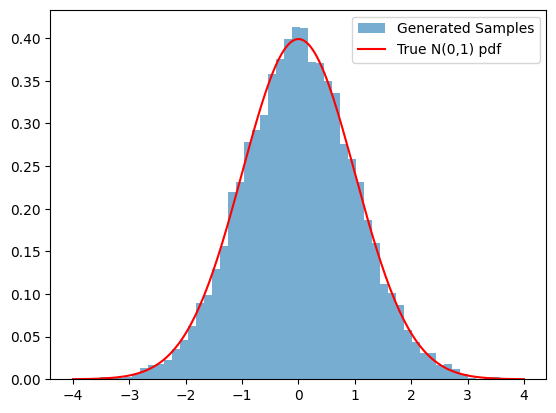

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# target normal dist
def f(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
#proposed laplace dist
def g(x):
    return 0.5 * np.exp(-np.abs(x))
k = np.sqrt(2 * np.e / np.pi)
# acceptance-rejection sampler
def sample_normal_ar(n_samples=1000):
    samples = []
    trials = 0
    while len(samples) < n_samples:
        Y = laplace_inverse(1)[0]    # proposal sample
        U = np.random.rand()
        trials += 1
        if U <= f(Y) / (k * g(Y)):   # accept condition
            samples.append(Y)
    return np.array(samples), trials

samples, trials = sample_normal_ar(10000)

print("Generated 10,000 samples")
print(f"Total proposals used: {trials}")
print(f"Average proposals per accepted sample: {trials / len(samples):.3f}")
print(f"Theoretical expected value: {k:.3f}")

# Plot histogram vs. true density
x = np.linspace(-4, 4, 200)
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Generated Samples")
plt.plot(x, f(x), 'r-', label="True N(0,1) pdf")
plt.legend()
plt.show()

# We used ChatGPT to assist in the code and derivation of k

<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

Generated 1,000 samples
Total proposals used: 1307
Average proposals per accepted sample: 1.307
Theoretical expected value: 1.315
95% CI for uniforms/sample: (1.236, 1.378)


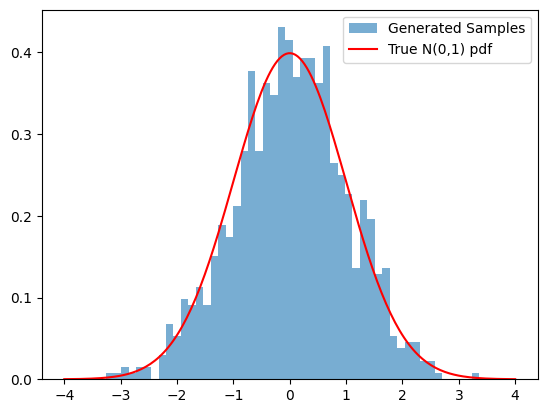

In [27]:
samples, trials = sample_normal_ar(1000)

print("Generated 1,000 samples")
print(f"Total proposals used: {trials}")
print(f"Average proposals per accepted sample: {trials / len(samples):.3f}")
print(f"Theoretical expected value: {k:.3f}")

# confidence interval
std_err = np.sqrt(trials) / len(samples)   # approx standard error
average = trials / len(samples)
ci_low = average - 1.96 * std_err
ci_high = average + 1.96 * std_err
print(f"95% CI for uniforms/sample: ({ci_low:.3f}, {ci_high:.3f})")

# plot hist vs true density
x = np.linspace(-4, 4, 200)
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Generated Samples")
plt.plot(x, f(x), 'r-', label="True N(0,1) pdf")
plt.legend()
plt.show()

<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

Given a Cauchy distribution as $g(x)$, we know that the cdf of a Cauchy distribution is
$G(x) = \frac{1}{\pi} arctan(x) + \frac{1}{2}
$
The inverse of the cdf is
$$ G(x) = U = \frac{1}{\pi} arctan(x) + \frac{1}{2}
$$
$$ π(U - \frac{1}{2}) = arctan(x)
$$
$$ x = tan[π(U - \frac{1}{2})]
$$
So, $ x = tan[π(U - \frac{1}{2})]
$ is the inverse sampler function.

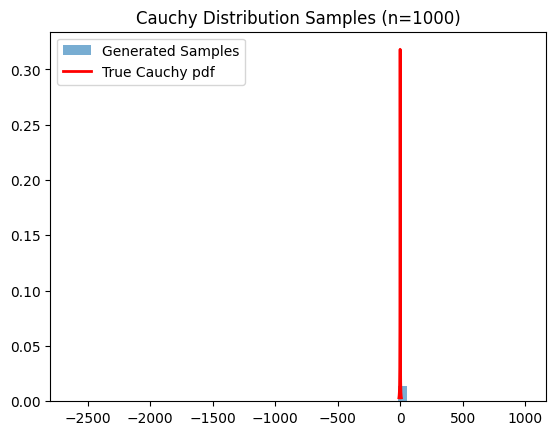

In [28]:
# cauchy inverse sampler function
def sample_cauchy(n=1000):
    U = np.random.rand(n)
    X = np.tan(np.pi * (U - 0.5))
    return X

# generate 1000 samples
samples = sample_cauchy(1000)
# plot histogram
x = np.linspace(-10, 10, 500)
pdf = 1 / (np.pi * (1 + x**2)) # cauchy pdf

plt.hist(samples, bins=50, density=True, alpha=0.6, label="Generated Samples")
plt.plot(x, pdf, 'r-', lw=2, label="True Cauchy pdf")
plt.legend()
plt.title("Cauchy Distribution Samples (n=1000)")
plt.show()


<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.
### Ans.
b)
$$
k \geq \frac{f(x)}{g(x)}
$$

The ratio is
$$
k = \frac{f(x)}{g(x)}
= \frac{\tfrac{1}{\sqrt{2\pi}} e^{-x^{2}/2}}{\frac{1}{\pi(1+x^2)}}
$$
$$
k = \frac{\pi e^{-\frac{x^2}{2}} (1+x^2)}{\sqrt{2\pi}}
$$

Plug in x = 0, 1:

$$ k = \frac{\pi}{\sqrt{2\pi}} , \frac{\pi}{\sqrt{2\pi}}(2e^{-\frac{1}{2}})
$$


Thus, the global maximum and smallest value of k satisying our condition is $$k = \frac{\pi}{\sqrt{2\pi}}(2e^{-\frac{1}{2}})
$$

Generated 1000 samples
Total proposals used: 1509
Average proposals per accepted sample: 1.509
Theoretical expected value: 1.520
95% CI: (1.433, 1.585)


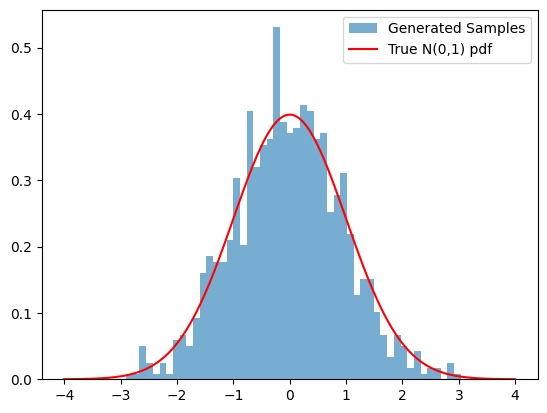

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# target density: N(0,1)
def f(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)

# proposal density: standard Cauchy
def g(x):
    return 1 / (np.pi * (1 + x**2))

# constant k
k = (np.pi / np.sqrt(2*np.pi)) * (2 * np.exp(-0.5))

def sample_normal_ar(n_samples=1000):
    samples = []
    trials = 0
    while len(samples) < n_samples:
        trials += 1
        # sample from Cauchy inverse cdf
        u = np.random.rand()
        y = np.tan(np.pi * (u - 0.5))

        # accept-reject step
        u2 = np.random.rand()
        if u2 <= f(y) / (k * g(y)):
            samples.append(y)
    return np.array(samples), trials

# run experiment
samples, trials = sample_normal_ar(1000)

print(f"Generated 1000 samples")
print(f"Total proposals used: {trials}")
print(f"Average proposals per accepted sample: {trials/len(samples):.3f}")
print(f"Theoretical expected value: {k:.3f}")

# CI for avg proposals/sample
avg_uniforms = trials / len(samples)
std_err = np.sqrt(trials) / len(samples)   # approximate SE
ci_low = avg_uniforms - 1.96 * std_err
ci_high = avg_uniforms + 1.96 * std_err
print(f"95% CI: ({ci_low:.3f}, {ci_high:.3f})")

# histogram vs. true density
x = np.linspace(-4, 4, 200)
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Generated Samples")
plt.plot(x, f(x), 'r-', label="True N(0,1) pdf")
plt.legend()
plt.show()